In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import random
%matplotlib notebook

In [2]:
u = 2
a = 4

<IPython.core.display.Javascript object>


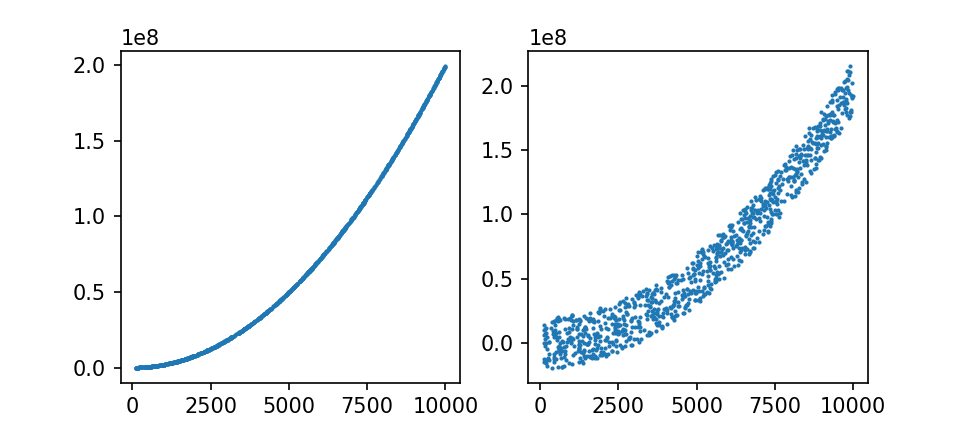

In [3]:
t = np.random.randint(100, 10001, 1000)
s = u*t + 0.5*a*t*t
s_with_noise = []
noise_band = (s.max()-s.min())*0.1
for i in s:
    s_with_noise.append(random.uniform(i-noise_band, i+noise_band))

s_with_noise = np.array(s_with_noise)

fig = plt.figure(figsize =(9, 4))
plt.subplot(1,2,1)
plt.scatter(t, s, s=1)
plt.subplot(1,2,2)
plt.scatter(t, s_with_noise, s=1)
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def plot_model(s, t):
    model = LinearRegression()
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_t = poly.fit_transform(pd.DataFrame(t, columns=['s']))
    model.fit(poly_t,s)
    print(f'r2_score = {model.score(poly_t,s)}')
    x_axis = pd.DataFrame(np.arange(t.min(), t.max(), 1))
    x_to_predict = poly.fit_transform(x_axis)
    y_axis = model.predict(x_to_predict)
    plt.scatter(t, s, s=1)
    plt.plot(y_axis, color='orange')
    plt.show()

r2_score = 1.0


<IPython.core.display.Javascript object>


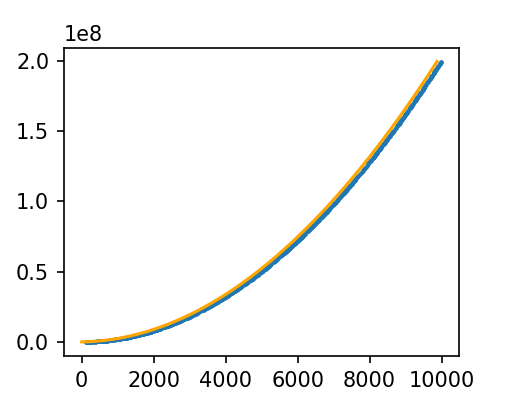

In [5]:
plot_model(s, t)

r2_score = 0.965514833284703


<IPython.core.display.Javascript object>


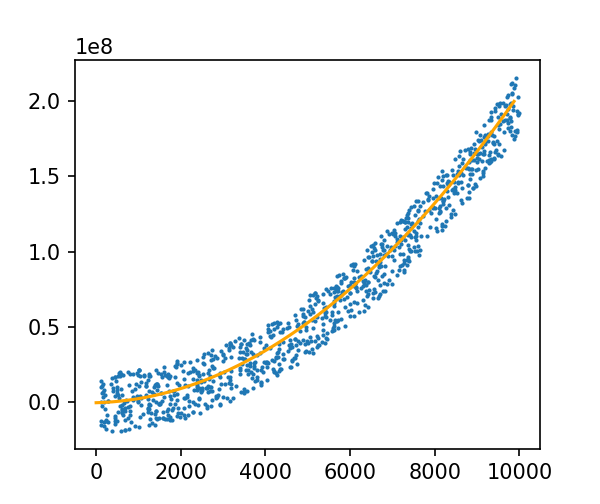

In [6]:
plot_model(s_with_noise, t)

In [31]:
def plot_3d_model(s, t):
    ax = plt.axes(projection='3d')
    model = LinearRegression()
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_t = poly.fit_transform(pd.DataFrame(t, columns=['s']))
    model.fit(poly_t,s)
    print(f'r2_score = {model.score(poly_t,s)}')
    x_axis = pd.DataFrame(np.arange(t.min(), t.max(), 1))
    x_to_predict = poly.fit_transform(x_axis)
    y_axis = model.predict(x_to_predict)
    xdata = poly_t[:,0]
    ydata = poly_t[:,1]
    zdata = s
    ax.scatter3D(xdata, ydata, zdata, s=1, c='yellow')
    xline = x_to_predict[:,0]
    yline = x_to_predict[:,1]
    zline = y_axis
    ax.plot3D(xline, yline, zline, 'red')
    ax.set_xlabel('t')
    ax.set_ylabel('t^2')
    ax.set_zlabel('s')
    plt.show()

<IPython.core.display.Javascript object>


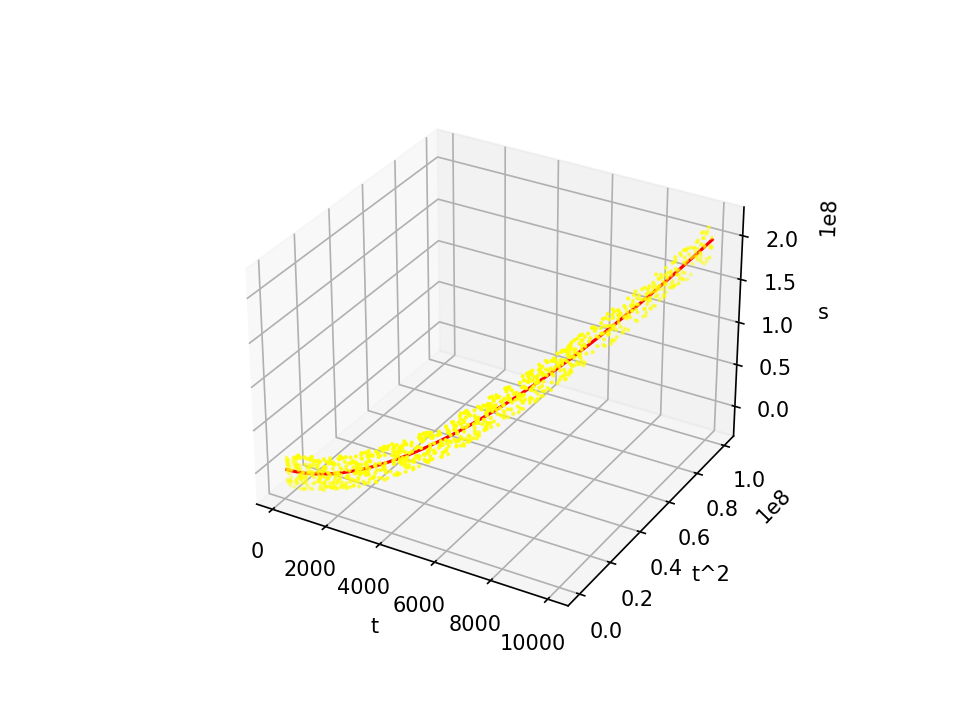

r2_score = 0.965514833284703


In [32]:
plot_3d_model(s_with_noise, t)